In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df1=pd.read_csv("ParisHousing.csv")
df1[5:25]

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
5,39223,36,0,1,17,39489,8,6,2012,0,1,2009,4552,757,0,1,3926647.2
6,58682,10,1,1,99,6450,10,9,1995,1,1,5930,9453,848,0,5,5876376.5
7,86929,100,1,0,11,98155,3,4,2003,1,0,6326,4748,654,0,10,8696869.3
8,51522,3,0,0,61,9047,8,3,2012,1,1,632,5792,807,1,5,5154055.2
9,39686,42,0,0,15,71019,5,8,2021,1,1,5198,5342,591,1,3,3970892.1
10,23563,21,0,1,90,91058,6,8,1993,1,0,703,852,684,1,10,2366397.3
11,96470,74,1,0,21,92029,4,2,2011,1,1,5414,1172,716,1,9,9652258.1
12,19127,31,1,0,5,7475,2,9,2008,0,0,5387,4430,374,0,4,1914688.8
13,13087,44,1,0,77,40475,8,4,2004,1,0,1745,724,582,0,0,1320803.4
14,79770,3,0,1,69,54812,10,5,2018,0,1,8871,7117,240,0,7,7986665.8


In [20]:
df1.shape
df1.squareMeters.describe()

count    10000.00000
mean     49870.13120
std      28774.37535
min         89.00000
25%      25098.50000
50%      50105.50000
75%      74609.75000
max      99999.00000
Name: squareMeters, dtype: float64

In [4]:
print(df1.isnull().sum())

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64


#### Feature Selection

In [5]:
correlation_matrix=df1.corr()
# On observe la corrélation des différentes features avec la colonne 'Price' 
feature_coorelation=correlation_matrix["price"].sort_values(ascending=False)
print (feature_coorelation)

price                1.000000
squareMeters         0.999999
numPrevOwners        0.016619
numberOfRooms        0.009591
cityPartRange        0.008813
hasStormProtector    0.007496
floors               0.001654
attic               -0.000600
hasGuestRoom        -0.000644
cityCode            -0.001539
hasStorageRoom      -0.003485
basement            -0.003967
hasPool             -0.005070
hasYard             -0.006119
made                -0.007210
isNewBuilt          -0.010643
garage              -0.017229
Name: price, dtype: float64


<Axes: xlabel='price', ylabel='squareMeters'>

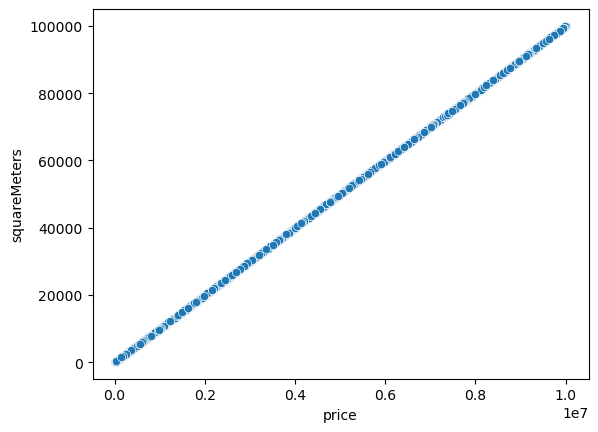

In [6]:
# On a trouvé une grande corrélation entre le prix et la superficie de la maison 
sns.scatterplot(df1,x="price",y="squareMeters")

### 3- feature Engineering

- Feature 1: Prix/m2
- Feature 2: Age De La Propriété

In [7]:
df2=df1.copy()
df2['price_per_sqft']=df2['price']/df2['squareMeters']
df2.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,price_per_sqft
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,100.089794
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,100.110058
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,100.061784
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,100.029744
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,100.172543


In [8]:
import datetime
current_year=datetime.datetime.now().year
df2['ageOfProperty']=current_year - df2['made']
df2.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,price_per_sqft,ageOfProperty
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,100.089794,19
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,100.110058,9
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,100.061784,3
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,100.029744,12
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,100.172543,34


In [9]:
df2.price_per_sqft.describe()

count    10000.000000
mean       100.466908
std          2.089565
min        100.004580
25%        100.072574
50%        100.130111
75%        100.256570
max        160.785106
Name: price_per_sqft, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
# On définit les features (X) et la variable target (y)
X = df2.drop(columns=['price'])  # Features
y = df2['price']  # Target variable
X.drop("price_per_sqft",axis=1,inplace=True)
# On divise els données sous forme (80%) pour le training et testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### K-Cross Validation

In [11]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
from sklearn.linear_model import LinearRegression

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.99999957, 0.99999956, 0.99999955, 0.99999956, 0.99999958])

### On va essayer de trouver le meilleur modele en utilsiant GridSearchCV

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Ajoute la normalisation
    ('regressor', LinearRegression())
])

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': pipeline,
            'params': {
            'regressor__fit_intercept': [True, False],
            'regressor__positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)


C:\Users\Ordinateur\anaconda3\envs\ml_env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ordinateur\anaconda3\envs\ml_env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ordinateur\anaconda3\envs\ml_env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Ordinateur\anaconda3\envs\ml_env\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parame

,model,best_score,best_params
0,linear_regression,1.000000,"{'regressor__fit_intercept': True, 'regressor_..."
1,lasso,1.000000,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.999996,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


### Utilisation Du Meilleur Modèle (Regression Linéaire)

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


model = LinearRegression()

model.fit(X_train, y_train)
# Faire Prédictions sur les données de test
y_pred = model.predict(X_test)
# Calcul des Scores Du Modèle
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 1510.034180854085
Mean Squared Error: 3695708.440618265
Root Mean Squared Error: 1922.4225447643566


## 6 Prediction

In [14]:
# Definir et assigner des variables pour une nouvelle maison
new_square_meters = 75523
new_number_of_rooms = 4  
new_has_yard = 1  
new_has_pool = 0  
new_floors = 2 
new_city_code = 9373 
new_city_part_range = 3 
new_num_prev_owners = 1  
new_construction_year = 2020  
new_is_new_built = 1  
new_has_storm_protector = 1  
new_basement = 0  
new_attic = 1  
new_garage = 1 
new_has_storage_room = 1  
new_has_guest_room = 0 
new_ageOfProperty=3

In [15]:
# créer un Dataframe pour les nouvelles fonctionnalités de la maison
new_house_features = pd.DataFrame({
    'squareMeters': [new_square_meters],
    'numberOfRooms': [new_number_of_rooms],
    'hasYard': [new_has_yard],
    'hasPool': [new_has_pool],
    'floors': [new_floors],
    'cityCode': [new_city_code],
    'cityPartRange': [new_city_part_range],
    'numPrevOwners': [new_num_prev_owners],
    'made': [new_construction_year],
    'isNewBuilt': [new_is_new_built],
    'hasStormProtector': [new_has_storm_protector],
    'basement': [new_basement],
    'attic': [new_attic],
    'garage': [new_garage],
    'hasStorageRoom': [new_has_storage_room],
    'hasGuestRoom': [new_has_guest_room],
    'ageOfProperty':[new_ageOfProperty]
    
})

In [16]:
# Maintenant nous faisons des prédictions en utilisant le modèle entrainé
predicted_price =model.predict(new_house_features)
print(f"the Predicted Price:€{predicted_price[0]:.2f}")

the Predicted Price:€7556116.27


#### - Exporter Le Modèle Entrainé dans un pickle file

In [18]:
import pickle
with open('paris_home_prices_model.pickle','wb') as f:
    pickle.dump(model,f)


## Exportez les infos d'emplacement et de colonne vers un fichier qui sera utile plus tard dans le front de notre app

In [19]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [ ]:
def get_estimated_price(sqft,numberOfRooms,cityPartRange,numPreviousOwner):


    x = np.zeros(17)
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index>=0:
        x[loc_index] = 1

    return round(__model.predict([x])[0],2)